<a href="https://colab.research.google.com/github/Qgly33/PPPO_Projekat_IT39-2021_Robert_Kugli/blob/main/PPPO_Projekat_IT39_2021_Robert_Kugli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principi prezentacije i prepoznavanja oblika 2024/2025**

IT 39/2021 Robert Kugli

**Tema projektnog zadatka:** Detekcija lica na primeru slika glumaca iz Avengers-a

# **Sadržaj**  
1. Uvod  

2. Teorijski deo  

3. Vodič kroz praktični rad  

4. Analiza dataseta

5. Odabir tehnologija

6. Učitavanje dataseta

7. Praktični deo

8. Zaključak

9. Literatura


# **1. Uvod**

Detekcija lica je oblast istraživanja i primene koja se bavi automatskom detekcijom lica na digitalnim slikama i video zapisima. Ona predstavlja osnovu za brojne praktične sisteme, kao što su sistemi za video nadzor i bezbednost, otključavanje uređaja putem prepoznavanja lica, filtriranje sadržaja na društvenim mrežama (na primer za prevenciju neprikladnog sadržaja, kao što su nasilje ili pornografija) i analitika ponašanja u marketingu (na primer detekcija izraza lica ili koliko ljudi gleda u određeni proizvod/reklamu).

Tokom poslednjih 20 godina razvijeni su različiti pristupi za automatsko prepoznavanje lica. Prvi metodi zasnivali su se na analizi kontrasta i jednostavnih matematičkih karakteristika slike, dok su kasnije uvedeni napredniji algoritmi koji koriste tehnike mašinskog učenja i duboke neuronske mreže. Detekcija lica je i dalje aktivna oblast istraživanja jer je potrebno postići stabilnost i tačnost u uslovima koji nisu idealni, kao što su promena osvetljenja, različiti uglovi snimanja, zaklanjanje lica itd.

U ovom projektu obrađuje se konkretan dataset sa slikama lica likova iz serijala *Avengers*, a cilj je da se kroz praktičan rad prikažu i uporede klasične i modernije metode detekcije lica, uz objašnjenje njihovih prednosti i ograničenja.

# **2. Teorijski deo**

Prvi metodi detekcije lica zasnivali su se na klasičnim algoritmima mašinskog učenja, kao što je **Haar Cascade Classifier**, koji koristi **Haar-like** karakteristike i **kaskadni klasifikator** treniran pomoću **AdaBoost** algoritma. Ovaj metod je jednostavan, brz i dobro funkcioniše za frontalna lica, ali ima problema sa osvetljenjem, rotacijom i delimičnim zaklanjanjem lica.

Kasniji napredak doneo je *duboke neuronske mreže* i algoritme poput **MTCNN** (**M**ulti-**t**ask **C**ascaded **C**onvolutional **N**etworks) koji omogućavaju mnogo detaljniju detekciju. **MTCNN** koristi kaskadu od 3 **konvolucione mreže** različite složenosti za detekciju lica, preciziranje lokacije i izdvajanje ključnih tačaka lica (na primer oči, nos, usta).

Za moj dataset koji sadrži samo slike lica, primena detektora poput **Haar Cascade** i **MTCNN** omogućava proveru da li su lica pravilno prepoznata i koliko je metod otporan na razne varijacije.

Važno je spomenuti da postoji još jedan pristup detekciji lica i on se zove **HOG** (**Histogram of Oriented Gradients**). Ova metoda je manje precizna od novijih, kao što je na primer MTCNN. Loše radi kada se lice rotira, kada se lice zakloni i kada je osvetljenje lošije. Jednostavno rečeno, ovaj pristup detekciji lica je zastareo i zbog toga neće biti korišćen prilikom izrade ovog projektnog zadatka.

# **3. Kratak vodič kroz praktični rad**

U ovom delu biće objašnjen redosled rada prilikom izrade projekta.

1. **Analiza dataseta** - proučavanje datih podataka

2. **Odabir tehnologija** - opis tehnologija koje će da se koriste u izradi projekta

3. **Učitavanje dataseta** - način učitavanja podataka za dalju analizu

4. **Priprema podataka** - priprema učitanih podataka za dalju analizu

5. **Primena gotovih modela za detekciju lica** - implementacija Haar Cascade i MTCNN metoda

6. **Evaluacija performansi dvaju modela** - poređenje rezultata i analiza preciznosti

# **4. Analiza dataseta**

Za potrebe ovog projektnog zadatka biće korišćen set podataka koji je preuzet sa sledećeg linka:

[AVENGERS_FaceDetection.zip](https://drive.google.com/file/d/1tMVPAJYk1wILu9qxH-XfHBVK_d2sERad/view?usp=sharing)

AVENGERS_FaceDetection.zip u sebi sadrži 5 foldera, 4 foldera za 4 različita glumca i 1 folder za glumicu. To su sledeći folderi:

1. chris_evans

2. chris_hemsworth

3. mark_ruffalo

4. robert_downey_jr

5. scarlett_johansson

Ovaj set podataka sadrži ukupno 274 fotografije lica. Slike su različitih dimenzija i kvaliteta, sa varijacijama u osvetljenju i položaju lica.

# **5. Odabir tehnologija**

U ovom projektu biće korišćene 2 metode za detekciju lica, a to su Haar Cascade i MTCNN. Pre objašnjenja ovih metoda važno je razumeti šta je to računarski (kompjuterski) vid. Računarski vid uključuje metode za prikupljanje, obradu, analizu i razumevanje digitalnih slika, kao i ekstrakciju visokodimenzionalnih podataka iz stvarnog sveta, kako bi se proizvele numeričke ili simboličke informacije, na primer u formi odluka. To zapravo predstavlja transformaciju slika u opise koji imaju smisla za misaone procese i mogu da izazovu odgovarajuću akciju.

Haar Cascade će biti korišćen pomoću OpenCV. OpenCV je biblioteka otvorenog koda za kompjuterski vid i mašinsko učenje i široko je rasprostrenja u svetu. OpenCV sadrži pre-trenirane modele za Haar Cascade metodu detekcije lica, očiju i drugih objekata. Ti pre-trenirani modeli su zapravo XML datoteke. Najčešće korišćeni pre-trenirani modeli su:

1. haarcascade_frontalface_default.xml - Model za detekciju frontalnih lica. Jedan od najpopularnijih modela koji se koriste za detekciju lica.

2. haarcascade_eye.xml - Model za detekciju očiju.

3. haarcascade_fullbody.xml - Model za detekciju celog ljudskog tela.

4. haarcascade_smile.xml - Model za detekciju osmeha.

5. haarcascade_profileface.xml - Model za detekciju lica iz profila (bočna strana lica).

Za korišćenje MTCNN metode potrebna je biblioteka mtcnn koju ćemo instalirati pomoću komande !pip install mtcnn. Ova biblioteka dolazi sa pre-treniranom MTCNN arhitekturom, koja je trenirana na velikim skupovima podataka sa licima, pa možemo direktno da koristimo metodu detector.detect_faces() da dobijemo koordinate lica.

# **6. Učitavanja dataseta**

U ovoj sekciji će biti prikazan način učitavanja podataka sa Google Drive-a. Da bi učitali dataset sa Drive-a preko linka, potrebno je instalirati biblioteku za preuzimanje fajlova sa istog. To se radi pomoću komande !pip. Nakon toga je potrebno napisati ID tog fajla koji se nalazi u samom linku. Zatim, -o predstavlja naziv pod kojim će fajl biti sačuvan lokalno, dok se -q koristi za quiet mod odnosno tihu instalaciju gde se korisniku neće prikazivati detaljni izveštaji o napretku instalacije, a gdown omogućava pristup podacima koji nisu lokalno sačuvani.

In [1]:
import os
!pip install -q gdown
!gdown --id 1tMVPAJYk1wILu9qxH-XfHBVK_d2sERad -O AVENGERS_FaceDetection.zip

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1tMVPAJYk1wILu9qxH-XfHBVK_d2sERad
From (redirected): https://drive.google.com/uc?id=1tMVPAJYk1wILu9qxH-XfHBVK_d2sERad&confirm=t&uuid=b26deb59-b626-490e-b865-4e13140eb0f2
To: /content/AVENGERS_FaceDetection.zip
100% 57.2M/57.2M [00:00<00:00, 72.7MB/s]


Nakon ovoga potrebno je raspakovati zip fajl u lokalni folder koji ću nazvati *data*. Neophodno je importovati *zipfile*. On nam omogućava rad sa zip datotekama, dok argument 'r' označava mod otvaranja zip fajla i zapravo znači read. Upotreba *with* izraza osigurava da će se fajl automatski zatvoriti nakon što se završi rad sa njim, pa makar i da je došlo do neke greške.

In [2]:
import zipfile
with zipfile.ZipFile("AVENGERS_FaceDetection.zip", 'r') as zip_ref:
  zip_ref.extractall("data")

Nakon ovih koraka podaci su učitani i spremni za dalji rad.

# **7. Praktični deo**

U ovoj sekciji biće odrađen glavni deo projekta, odnosno kreiranje modela za detekciju lica, te njegovo testiranje i evaluacija.

**Priprema podataka**

Kod rekurzivno prolazi kroz sve foldere dataseta, pronalazi slike formata JPG/JPEG/PNG, učitava ih i pomoću već opisane OpenCV biblioteke konvertuje iz **BGR** (**B**lue, **G**reen, **R**ed) u **RGB** format i čuva ih u listu *all_images*. Svakoj slici dodeljuje se labela 1, jer sve sadrže lice. Na kraju se ispisuje ukupan broj učitanih slika.



In [3]:
import cv2
from pathlib import Path

dataset_path =Path("/content/data")

all_images = []
all_labels = []


for img_path in dataset_path.rglob("*.*"):
  if img_path.suffix.lower() in [".jpg", ".jpeg", ".png"]:
    img = cv2.imread(str(img_path))
    if img is None:
      continue
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  all_images.append(img_rgb)
  all_labels.append(1)

print(f"Ukupno učitano slika: {len(all_images)}")

Ukupno učitano slika: 274


**Primena gotovih modela za detekciju lica**


**Haar Cascade metoda detekcije lica**

Prvo učitavam slike i konvertujem ih iz **BGR** u **RGB** format. Pozivanjem funckije *detect_haar*, slika se dodatno pretvara u grayscale jer Haar Cascade klasifikator radi na sivim tonovima, a ne na bojama. Klasifikator dalje prolazi kroz različite prozore slike u više razmera (zahvaljujući parametru *scaleFactor*) tražeći obrasce koji liče na lice. Parametar *minNeighbors* kontroliše koliko puta region mora biti detektovan da bi se smatrao pouzdanim, dok *minSize* sprečava otkrivanje suviše malih oblasti koje verovatno nisu lica. Rezultat su koordinate pravougaonika koji predstavljaju pronađena lica. Dakle, ovaj metod detekcije lica funkcioniše tako što sliku pretražuje prozor po prozor, uvećava ili smanjuje skalu i filtrira regione koji ne liče na lice, dok na kraju ostaju samo pravougaonici za koje je model procenio da odgovaraju licu.

In [4]:
import cv2

haar_path = cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
haar = cv2.CascadeClassifier(haar_path)

def detect_haar(img_rgb, scaleFactor=1.1, minNeighbors=5, minSize=(30,30)):
  img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
  faces = haar.detectMultiScale(
      img_gray,
      scaleFactor=scaleFactor,
      minNeighbors=minNeighbors,
      minSize=minSize
  )

  boxes = []
  for (x, y, w, h) in faces:
    boxes.append([x, y, x+w, y+h])
  return boxes

**MTCNN metoda detekcije lica**

Koristim biblioteku **MTCNN** koja ima unapred istreniran model za detekciju lica zasnovan na dubokim neuronskim mrežama. Kada pravim instancu **MTCNN()**, ja zapravo dobijam 3 mreže: **P-Net**, **R-Net** i **O-Net**, koje se nadovezuju jedna na drugu. Kada funkcija *detect_mtcnn* dobije ulaznu **RGB** sliku, ona poziva *mtcnn_detector.detext_faces(img_rgb)*, gde **P-Net** pronalazi moguće regione lica na različitim razmerama slike, **R-Net** filtrira i odbacuje nepouzdane kandidate, a **O-Net** dodatno precizira granice i vraća bounding box-ove i ključne tačke lica (oči, nos, usta). Iz svakog detektovanog lica uzimam bounding box (d['box']) i konvertujem ga u oblik [x1, y1, x2, y2], pri čemu vodim računa da koordinate ne budu negativne pomoću max(0, x). Na kraju funkcija vraća listu svih pronađenih lica u istoj formi kao i kod Haar metode, što mi omogućava lako upoređivanje rezultata Haar i MTCNN metode.

In [5]:
!pip install -q mtcnn
from mtcnn import MTCNN

mtcnn_detector = MTCNN()

def detect_mtcnn(img_rgb):
  detections = mtcnn_detector.detect_faces(img_rgb)
  boxes = []
  for d in detections:
    x, y, w, h = d['box']
    x1 = max(0, x)
    y1 = max(0, y)
    x2 = x1 + w
    y2 = y1 + h
    boxes.append([x1, y1, x2, y2])
  return boxes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.8 MB/s eta 0:00:00


**Evaluacija, poređenje dvaju modela i grafički prikaz**

U ovom delu koda napravljena je funkcija evaluate_detector koja meri koliko je uspešan i brz algoritam za detekciju lica. Za svaku sliku u skupu podataka poziva se detektor (bilo Haar, bilo MTCNN), meri se vreme potrebno za detekciju, broji se da li je barem jedno lice pronađeno i koliko je ukupno okvira otkriveno (detection_rate), prosečan broj okvira po slici (avg_boxes_per_image) i prosečno vreme obrade u milisekundama (avg_time_ms). Rezultati oba modela čuvaju se u rečniku results, a zatim se pomoću Matplotlib biblioteke crtaju 3 grafikona - prvi upoređuje uspešnost detekcije (detection rate), drugi prosečan broj pronađenih lica po slici, a treći brzinu izvršavanja. Na ovaj način sam dobio vizuelno poređenje performansi Haar i MTCNN metoda.

Zaključak na osnovu poređenja ove 2 metode jeste da Haar metoda obično radi brže jer koristi jednostavne obrasce i kaskadnu strukturu, ali može biti manje pouzdana i dati veći broj pogrešnih ili promašenih detekcija, posebno kada su lica u različitim uglovima, kada je slabije osvetljenje ili kada je lice delimično zaklonjeno. MTCNN je sporiji, pošto koristi duboke neuronske mreže i složenije korake obrade, ali zato ima viši detection rate i daje stabilnije rezultate jer bolje prepoznaje lice u zahtevnijim uslovima. Ukratko, Haar je pogodniji kada je važna brzina u real-time aplikacijama, dok je MTCNN bolji izbor kada je prioritet tačnost.

In [6]:
import time
from tqdm import tqdm
import numpy as np

def evaluate_detector(detector_fn, images):
  detected_images = 0
  total_boxes = 0
  total_time = 0

  for img in tqdm(images):
    start = time.time()
    boxes = detector_fn(img)
    end = time.time()

    total_time += (end - start)
    if len(boxes) > 0:
      detected_images += 1
    total_boxes += len(boxes)

  n = len(images)
  return {
      "detection_rate": detected_images / n,
      "avg_boxes_per_image": total_boxes / n,
      "avg_time_ms": (total_time / n) * 1000
  }


results = {}
results["Haar"] = evaluate_detector(detect_haar, all_images)
results["MTCNN"] = evaluate_detector(detect_mtcnn, all_images)

print(results)

100%|██████████| 274/274 [00:58<00:00,  4.72it/s]

{'Haar': {'detection_rate': 0.9817518248175182, 'avg_boxes_per_image': 0.9890510948905109, 'avg_time_ms': 99.15566792453292}, 'MTCNN': {'detection_rate': 0.9963503649635036, 'avg_boxes_per_image': 0.9963503649635036, 'avg_time_ms': 210.9438137416422}}


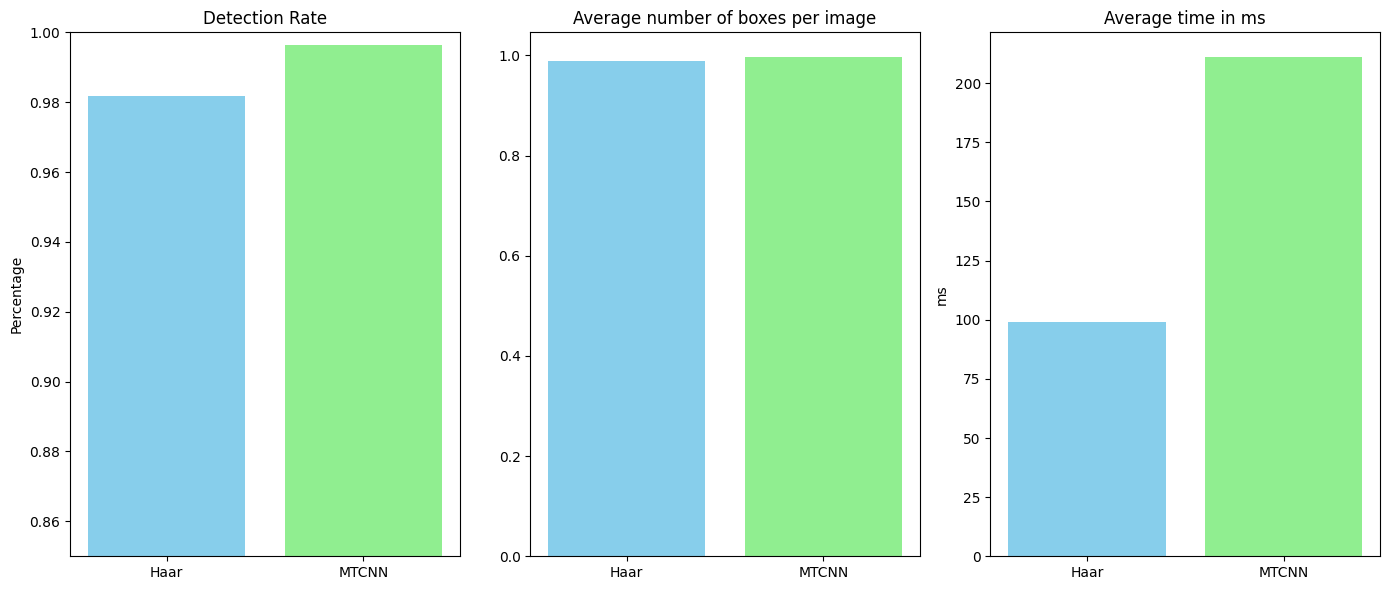

In [7]:
import matplotlib.pyplot as plt

methods = list(results.keys())
detection_rates = [results[m]["detection_rate"] for m in methods]
avg_boxes = [results[m]["avg_boxes_per_image"] for m in methods]
times = [results[m]["avg_time_ms"] for m in methods]

plt.figure(figsize=(14,6))

plt.subplot(1,3,1)
plt.bar(methods, detection_rates, color=["skyblue", "lightgreen"])
plt.title("Detection Rate")
plt.ylabel("Percentage")
plt.ylim(0.85,1.0)

plt.subplot(1,3,2)
plt.bar(methods, avg_boxes, color=["skyblue", "lightgreen"])
plt.title("Average number of boxes per image")

plt.subplot(1,3,3)
plt.bar(methods, times, color=["skyblue", "lightgreen"])
plt.title("Average time in ms")
plt.ylabel("ms")

plt.tight_layout()
plt.show()

**Vizuelno poređenje između Haar i MTCNN na 6 nasumičnih slika**

Ovde radim vizuelno poređenje Haar i MTCNN detektora na 6 nasumično odabranih slika iz skupa podataka. Funkcija draw_boxes služi da nacrta pravougaonike na kopiji slike, gde za Haar metodu koristim plave okvire, a za MTCNN zelene. Za svaku sliku prvo se poziva Haar detektor (detect_haar), zatim MTCNN (detect_mtcnn), pa se rezultati uporedo prikazuju pomoću matplotlib-a: sa leve strane stoji slika sa Haar detekcijom, a sa desne sa MTCNN detekcijom. Na ovaj način moguće je lako uočiti razlike u tačnosti. Na primer, Haar nekad promaši lice ili ga loše uokviri, dok MTCNN obično preciznije detektuje granice i pronalazi lice i u težim uslovima.

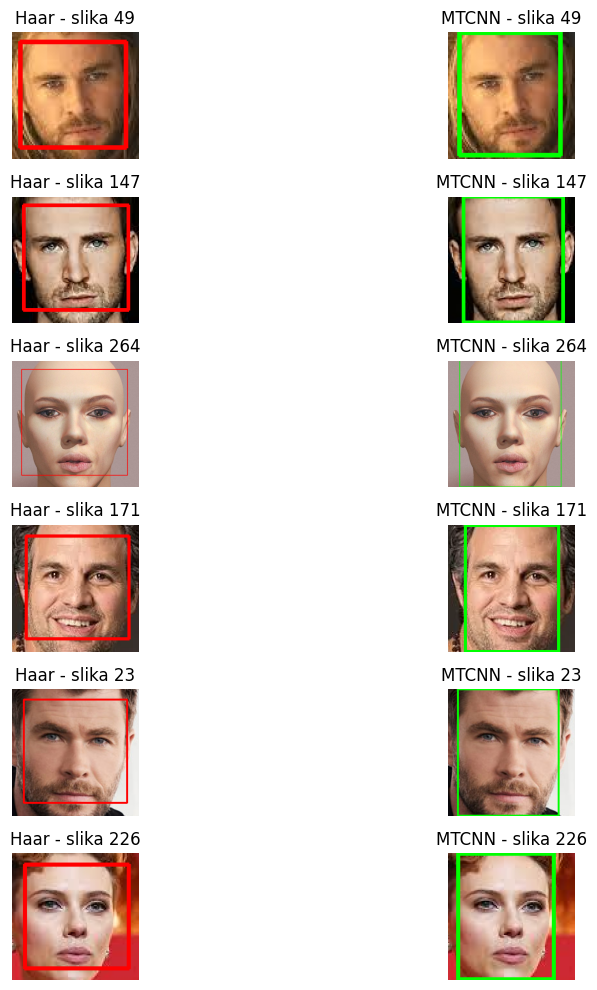

In [8]:
import random

def draw_boxes(img_rgb, boxes, color=(0,255,0)):
    """Crtanje bounding box-ova na slici"""
    img_copy = img_rgb.copy()
    for (x1,y1,x2,y2) in boxes:
        cv2.rectangle(img_copy, (x1,y1), (x2,y2), color, 2)
    return img_copy

# Uzmi 6 random slika
sample_indices = random.sample(range(len(all_images)), 6)

plt.figure(figsize=(12,10))

for i, idx in enumerate(sample_indices):
    img = all_images[idx]

    # Haar detekcija
    haar_boxes = detect_haar(img)
    img_haar = draw_boxes(img, haar_boxes, color=(255,0,0))  # plavi box

    # MTCNN detekcija
    mtcnn_boxes = detect_mtcnn(img)
    img_mtcnn = draw_boxes(img, mtcnn_boxes, color=(0,255,0))  # zeleni box

    # Plot za oba rezultata
    plt.subplot(len(sample_indices), 2, 2*i+1)
    plt.imshow(img_haar)
    plt.axis("off")
    plt.title(f"Haar - slika {idx}")

    plt.subplot(len(sample_indices), 2, 2*i+2)
    plt.imshow(img_mtcnn)
    plt.axis("off")
    plt.title(f"MTCNN - slika {idx}")

plt.tight_layout()
plt.show()


**Poređenje otpornosti na promene rezolucije**

Ovaj deo koda proverava koliko su Haar i MTCNN otporne na smanjenje/povećanje rezolucije slike. Funkcija *evaluate_at_resolution* uzima listu slika i za svaku zadatu rezoluciju (npr. 64x64, 128x128, 256x256 piksela) pravi novi skup umanjenih slika, pa na njima ponovo pokreće izabrani detektor lica. Kao rezultat dobija se stopa detekcije (detection_rate) za svaku rezoluciju. Rezultati se zatim crtaju na grafikon gde se porede performanse Haar-a i MTCNN-a u zavisnosti od veličine slike. Na ovaj način može jasno da se vidi koji model bolje prepoznaje lica kada se slike smanje, pri čemu Haar obično brže gubi tačnost, dok MTCNN zadržava stabilniju detekciju i na nižim rezolucijama.

100%|██████████| 274/274 [00:48<00:00,  5.67it/s]


Haar: {64: 0.9963503649635036, 128: 0.9781021897810219, 256: 0.9671532846715328}
MTCNN: {64: 0.9927007299270073, 128: 0.9927007299270073, 256: 0.9963503649635036}


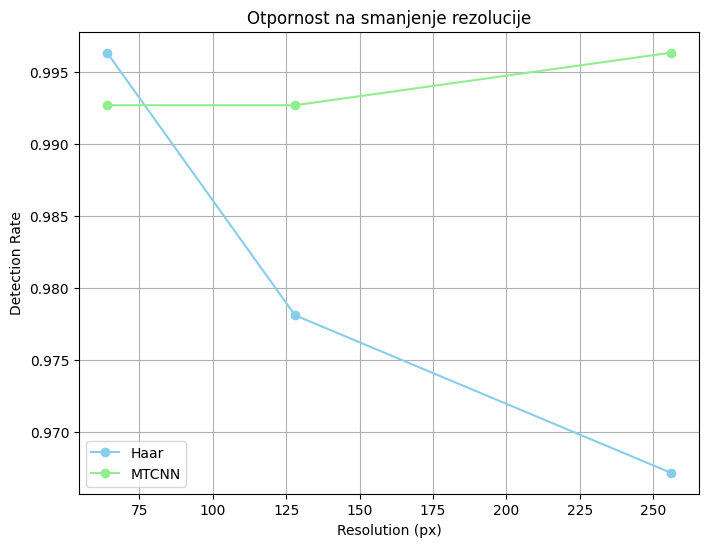

In [9]:
def evaluate_at_resolutions(images, detector_fn, resolutions=[64,128,256]):
    results = {}
    for res in resolutions:
        resized_images = [cv2.resize(img, (res, res)) for img in images]
        score = evaluate_detector(detector_fn, resized_images)
        results[res] = score["detection_rate"]
    return results

haar_res = evaluate_at_resolutions(all_images, detect_haar)
mtcnn_res = evaluate_at_resolutions(all_images, detect_mtcnn)

print("Haar:", haar_res)
print("MTCNN:", mtcnn_res)

# Plot
plt.figure(figsize=(8,6))
plt.plot(list(haar_res.keys()), list(haar_res.values()), marker="o", label="Haar", color="skyblue")
plt.plot(list(mtcnn_res.keys()), list(mtcnn_res.values()), marker="o", label="MTCNN", color="lightgreen")
plt.xlabel("Resolution (px)")
plt.ylabel("Detection Rate")
plt.title("Otpornost na smanjenje rezolucije")
plt.legend()
plt.grid(True)
plt.show()


**Poređenje otpornosti na šum i blur (zamućenost)**

Ovaj deo koda ispituje koliko su Haar i MTCNN otporni na šum i zamućenje tj. blur. Funkcije add_gaussian_noise i add_blur dodaju nasumični Gaussov šum i primenjuju Gaussovo zamućenje na originalne slike. Funkcija evaluate_with_distortion zatim meri stopu detekcije lica na ovim izmenjenim slikama koristeći izabrani detektor. Rezultati se upoređuju sa stopom detekcije na originalnim slikama i prikazuju grafički. Zaključak je da Haar metoda obično gubi na detekciji kada su slike šumovite ili zamućene, dok MTCNN, zahvaljujući dubokim konvolucionim mrežama, bolje održava tačnost, čak i u prisustvu šuma i blur efekata.

Ukratko, Gausovo zamućenje je metoda koja bluruje sliku tako što prosečno filtrira piksele u malom okruženju, pri čemu se vrednosti ponderišu po Gausovoj raspodeli. Rezultat je da detalji i ivice postaju mekše, a oštri prelazi se zamagljuju. Gausov šum (noise) predstavlja nasumične varijacije u osvetljenju ili bojama piksela, što može simulirati greške kamere ili kompresije. Gausov šum je tipičan šum kod kojeg su te varijacije raspoređene prema normalnoj (Gausovoj) raspodeli. U kontekstu detekcije lica, oba ova efetka otežavaju modelu da prepozna jasne konture i karakteristike lica. Primer Gausovog zamućenja i šuma pokazao sam na 5 nasumičnih slika iz dataseta.

100%|██████████| 274/274 [01:00<00:00,  4.52it/s]


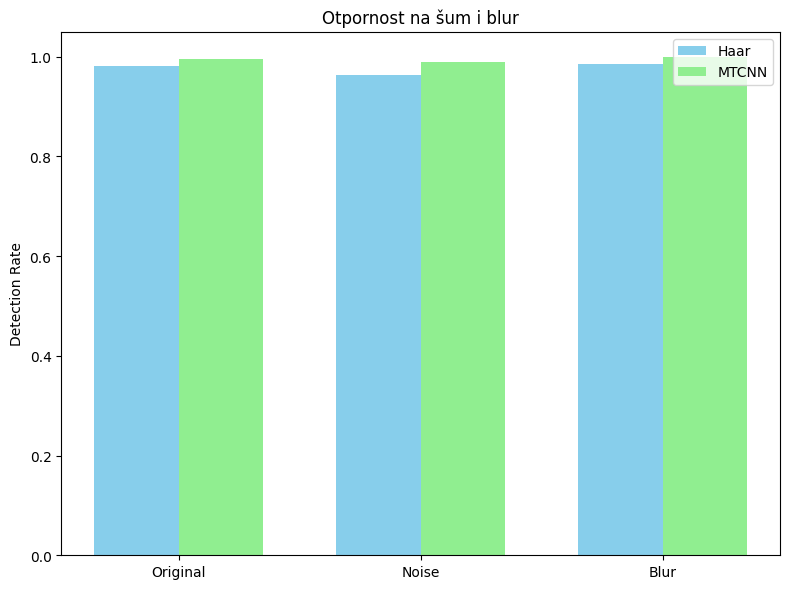

In [16]:
import cv2
import numpy as np

def add_gaussian_noise(img, mean=0, std=25):
    noise = np.random.normal(mean, std, img.shape).astype(np.float32)
    noisy_img = np.clip(img.astype(np.float32) + noise, 0, 255).astype(np.uint8)
    return noisy_img

def add_blur(img, ksize=(5,5)):
    return cv2.GaussianBlur(img, ksize, 0)

def evaluate_with_distortion(images, detector_fn, distortion_fn, name="distortion"):
    distorted = [distortion_fn(img) for img in images]
    score = evaluate_detector(detector_fn, distorted)
    return score["detection_rate"]

haar_noise = evaluate_with_distortion(all_images, detect_haar, add_gaussian_noise, "noise")
mtcnn_noise = evaluate_with_distortion(all_images, detect_mtcnn, add_gaussian_noise, "noise")

haar_blur = evaluate_with_distortion(all_images, detect_haar, add_blur, "blur")
mtcnn_blur = evaluate_with_distortion(all_images, detect_mtcnn, add_blur, "blur")

# Poređenje grafički
distortions = ["Original", "Noise", "Blur"]
haar_rates = [results["Haar"]["detection_rate"], haar_noise, haar_blur]
mtcnn_rates = [results["MTCNN"]["detection_rate"], mtcnn_noise, mtcnn_blur]

x = np.arange(len(distortions))
width = 0.35

plt.figure(figsize=(8,6))
plt.bar(x - width/2, haar_rates, width, label="Haar", color="skyblue")
plt.bar(x + width/2, mtcnn_rates, width, label="MTCNN", color="lightgreen")

plt.xticks(x, distortions)
plt.ylabel("Detection Rate")
plt.title("Otpornost na šum i blur")
plt.ylim(0, 1.05)
plt.legend()
plt.tight_layout()
plt.show()


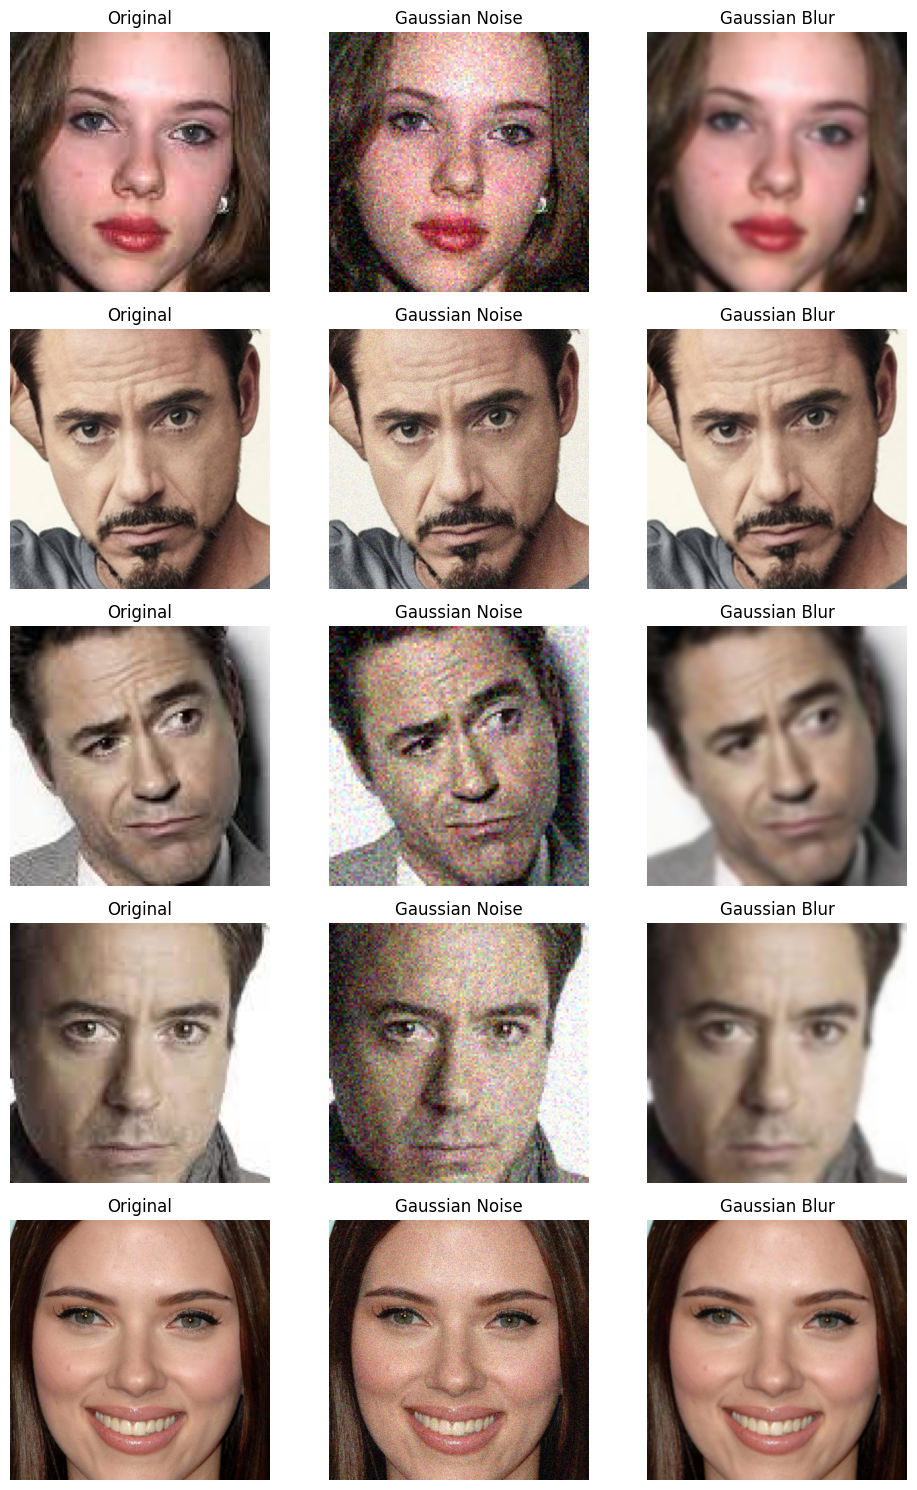

In [15]:
import random
import matplotlib.pyplot as plt

# uzmi 5 random slika
sample_images = random.sample(all_images, 5)

# prikaži original, šum i blur
fig, axes = plt.subplots(len(sample_images), 3, figsize=(10, 3*len(sample_images)))

for i, img in enumerate(sample_images):
    noisy = add_gaussian_noise(img)
    blurred = add_blur(img)

    axes[i,0].imshow(img)
    axes[i,0].set_title("Original")
    axes[i,1].imshow(noisy)
    axes[i,1].set_title("Gaussian Noise")
    axes[i,2].imshow(blurred)
    axes[i,2].set_title("Gaussian Blur")

    for j in range(3):
        axes[i,j].axis("off")

plt.tight_layout()
plt.show()

**Poređenje lažnih detekcija (više od 1 lica)**

Ovaj deo koda ispituje lažne detekcije tj. situacije kada detektor pronađe više lica nego što ih zapravo ima na slici (u mom slučaju očekuje se 1 lice po slici). Funkcija *false_positive_rate* prolazi kroz sve slike, poziva detektor i broji koliko puta je detektovano više od 1 lica. Rezultat se vraća kao procenat takvih slučajeva u ukupnom skupu slika. U praksi, Haar metoda zbog svoje osetljivosti na kontraste i slične oblike na slici može češće davati višestruke lažne detekcije, dok MTCNN, zahvaljujući konvolucionim dubokim mrežama i višestepenoj filtraciji slika, obično bolje razlikuje pravo lice od pozadine i drugih objekata, pa ima niži broj lažnih detekcija. Iz priloženog grafika se vidi da je false positive rate (FP rate) kod Haar metode jednak 0,001%, što na mom uzorku od 274 slike znači da su otprilike 3 slike problematične, tj. da je kod 3 slike Haar metoda napravila lažnu detekciju i detektovala više od 1 lica. U ovom kontekstu bolje je koristiti MTCNN metodu jer na uzorku od 274 slike nije napravila grešku.

Haar FP rate: 0.01
MTCNN FP rate: 0.00


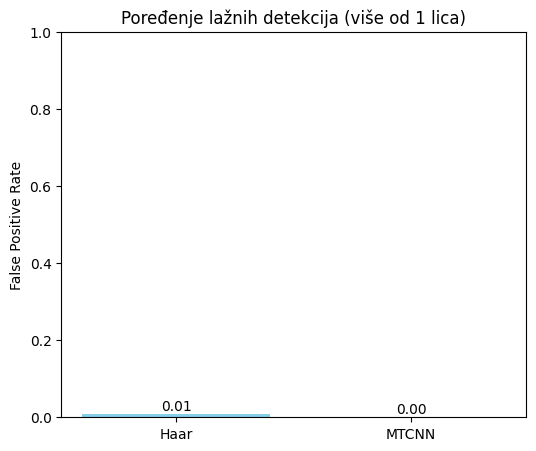

In [14]:
def false_positive_rate(detector_fn, images, expected=1):
    too_many = 0
    for img in images:
        boxes = detector_fn(img)
        if len(boxes) > expected:
            too_many += 1
    return too_many / len(images)

haar_fp = false_positive_rate(detect_haar, all_images)
mtcnn_fp = false_positive_rate(detect_mtcnn, all_images)

print(f"Haar FP rate: {haar_fp:.2f}")
print(f"MTCNN FP rate: {mtcnn_fp:.2f}")

# Grafički prikaz
plt.figure(figsize=(6,5))
plt.bar(["Haar", "MTCNN"], [haar_fp, mtcnn_fp], color=["skyblue", "lightgreen"])
for i, v in enumerate([haar_fp, mtcnn_fp]):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')
plt.ylabel("False Positive Rate")
plt.title("Poređenje lažnih detekcija (više od 1 lica)")
plt.ylim(0, 1)
plt.show()


**8. Zaključak**

Kroz ovaj projektni zadatak obradio sam temu detekcije lica na primeru dataseta sa glumcima iz serijala Avengers. Uporedio sam klasične metode poput Haar Cascade klasifikatora sa savremenijim pristupima koji koriste duboke neuronske mreže (konkretno metoda MTCNN). Analizom rezultata uočio sam da klasični metod može i dalje biti koristan u nekim jednostavnijim uslovima, ali je osetljiv na promene osvetljenja, uglove slikanja i zaklanjanje lica. Sa druge strane, savremene metode zasnovane na dubokom učenju pokazale su veću preciznost i otpornost na različite varijacije u podacima, ali dolaze uz cenu veće računarske složenosti. Time se potvrđuje da izbor metode zavisi od konteksta primene: klasične metode su pogodne za brza i jednostavna rešenja, dok su napredni algoritmi nužni kada je potreba visoka tačnost u složenim uslovima. Ovaj projekat pokazuje važnost razumevanja prednosti i ograničenja različitih pristupa i daje dobar osnov za dalja istraživanja u oblasti računarskog vida i detekcije lica. Bilo mi je zanimljivo da radim sa detekcijom lica i smatram da sam dosta toga naučio.

**9. Literatura**

1. Viola, P. & Jones, M. (2001). Rapid Object Detection using a Boosted Cascade of Simple Features. Proceedings of the IEEE Computer Society Conference on Computer Vision and Pattern Recognition.

2. Zhang, K., Zhang, Z., Li, Z., & Qiao, Y. (2016). Joint Face Detection and Alignment using Multi-task Cascaded Convolutional Networks. IEEE Signal Processing Letters.

3. OpenCV Documentation – https://docs.opencv.org/

4. MTCNN GitHub Repository – https://github.com/ipazc/mtcnn

5. Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep Learning. MIT Press.

6. Milosavljević, B. (2014). Mašinsko učenje – principi i primena. Beograd: Matematički fakultet.